# Sea Level Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Read CSV data using Pandas

In [2]:
df = pd.read_csv('epa-sea-level.csv')

### Quick look at the dataframe and its info

In [3]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


### Displaying the relation between the 'Year' and 'CSIRO Adjusted Sea Level' column in a scatter plot

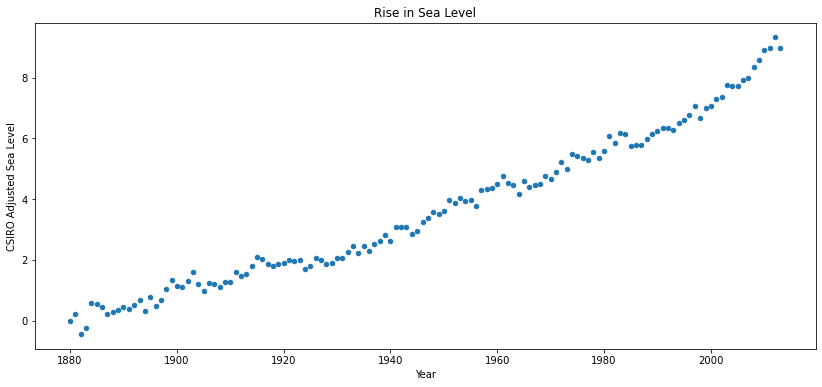

In [5]:
df.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', title= 'Rise in Sea Level', figsize=(14,6))

### Predicting the sea level rise through the year 2050 using linear regression (1)
Linear regression is used to get the slope and intercept of the line of best fit 

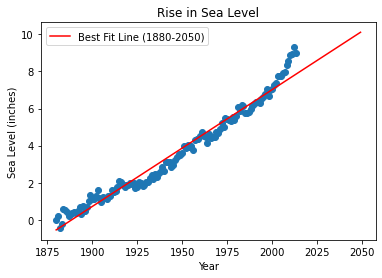

In [6]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

newfit = linregress(x, y)
newslope = newfit.slope
newinter = newfit.intercept

x1 = list(range(1880, 2050)) 
y1 = []

for year in x1:
    y1.append(newinter + newslope * year) 

plt.scatter(x, y)
plt.plot(x1, y1, 'r', label = 'Best Fit Line (1880-2050)')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()

### Predicting the sea level rise through the year 2050 using linear regression (2)
Only the data from the year 2000 through the most recent year in the dataset are being used to make a more accurate prediction

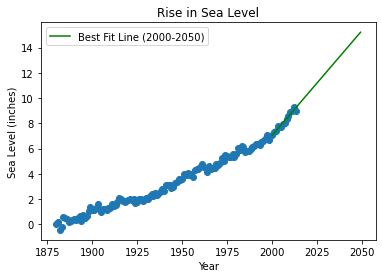

In [7]:
xfut = df[df['Year'] >= 2000]['Year']
yfut = df[df['Year'] >= 2000]['CSIRO Adjusted Sea Level']

newfit2 = linregress(xfut, yfut)
newslope2 = newfit2.slope
newinter2 = newfit2.intercept

x2 = list(range(2000, 2050)) 
y2 = []

for year in x2:
    y2.append(newinter2 + newslope2 * year)

plt.scatter(x, y)
plt.plot(x2, y2, 'g', label = 'Best Fit Line (2000-2050)')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()

### Comparison between two predictions

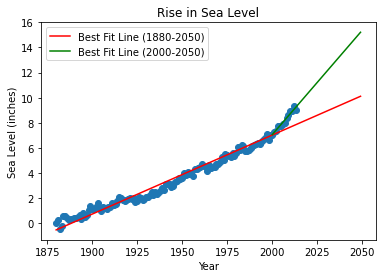

In [9]:
plt.scatter(x, y)
plt.plot(x1, y1, 'r', label = 'Best Fit Line (1880-2050)')
plt.plot(x2, y2, 'g', label = 'Best Fit Line (2000-2050)')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.show()